In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('customer.csv')
df.head()

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [6]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['review'] = le.fit_transform(df['review'])
df['education'] = le.fit_transform(df['education'])
df['purchased'] = le.fit_transform(df['purchased'])

c:\Users\kanth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kanth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kanth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kanth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

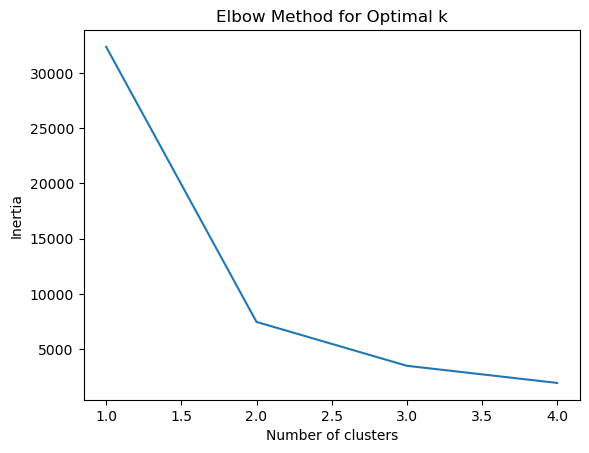

In [7]:
individual_clustering_score = []
for i in range(1,5):
    kmeans= KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    individual_clustering_score.append(kmeans.inertia_)

plt.plot(range(1,5), individual_clustering_score)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()  

In [8]:
#fit the model and predict the clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df)
pred= kmeans.predict(df)
pred

c:\Users\kanth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 2, 2, 1, 0, 0, 0, 2, 2, 1, 1, 1, 2, 2, 0, 1, 2, 0, 0, 1, 2, 0,
       0, 1, 0, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 0,
       1, 2, 2, 0, 0, 0])

In [9]:
df['cluster'] = pd.DataFrame(pred, columns=['cluster'])
df.head()

,age,gender,review,education,purchased,cluster
0,30,0,0,1,0,0
1,68,0,2,2,0,2
2,70,0,1,0,0,2
3,72,0,1,0,0,1
4,16,0,0,2,0,0


In [10]:
import seaborn as sns

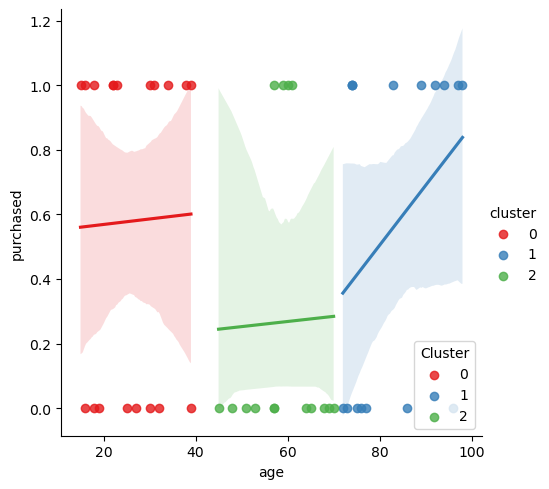

In [12]:
sns.lmplot(x='age', y='purchased', hue='cluster', data=df, palette='Set1')
plt.legend(title='Cluster')
plt.show()

In [13]:
kmeans.cluster_centers_

array([[26.        ,  0.36842105,  1.        ,  0.84210526,  0.57894737],
       [83.125     ,  0.625     ,  0.875     ,  1.1875    ,  0.5625    ],
       [58.93333333,  0.26666667,  1.4       ,  0.86666667,  0.26666667]])